# Tree-based Models

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
from sklearn import preprocessing

In [3]:
df = pd.read_csv("../data/bank.csv")

In [4]:
df_encoded = df.apply(preprocessing.LabelEncoder().fit_transform)

In [5]:
#Let's use duration, age to build the first model
X = df_encoded[["duration", "age"]]
y = df_encoded.deposit

# Decision Tree

In [6]:
import pydotplus 
from IPython.display import Image

In [7]:
from sklearn import tree

In [8]:
#build decision tree
clf = tree.DecisionTreeClassifier(max_depth=2)

In [9]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
clf = clf.fit(X, y)

In [11]:
dot_data = tree.export_graphviz(clf, out_file='tree.dot', 
feature_names=X.columns,
class_names=['No', 'Yes'], filled=True, 
rounded=True, special_characters=True)

In [12]:
graph = pydotplus.graph_from_dot_file('tree.dot')  

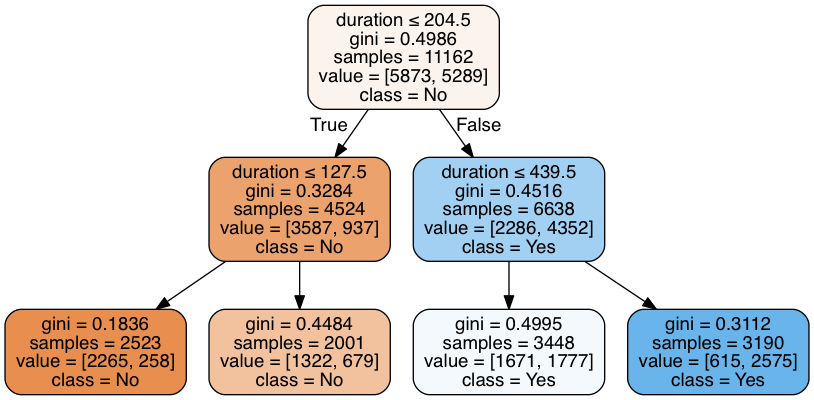

In [13]:
Image(graph.create_png()) 

# Exercise

In [14]:
#1. Find accuracy metrics
#2. Run with max_depth = 4, and max_depth=None.
#3. Report accuracy metrics on them

In [15]:
X = df_encoded.iloc[:,:16]
y = df_encoded.deposit

In [16]:
clf_4 = tree.DecisionTreeClassifier(max_depth=4)

In [17]:
clf_4.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
y_pred_4 = clf_4.predict(X)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y, y_pred_4)

0.79376455832288118

In [21]:
clf_all = tree.DecisionTreeClassifier()

In [22]:
clf_all.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
y_pred_all = clf_all.predict(X)

In [24]:
accuracy_score(y, y_pred_all)

1.0

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=4)

In [27]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
y_pred_forest = clf.predict(X)

In [29]:
accuracy_score(y, y_pred_forest)

0.81069700770471242

In [30]:
clf.feature_importances_

array([  3.11137853e-02,   2.32443665e-03,   6.40021840e-03,
         1.84898286e-03,   8.50838689e-06,   1.50321478e-02,
         5.21779037e-02,   6.88571715e-03,   1.11099546e-01,
         5.00355708e-03,   4.73193387e-02,   4.95673317e-01,
         6.71793302e-03,   7.06173123e-02,   5.29953663e-02,
         9.47819296e-02])

### out-of-bag error

The out-of-bag (OOB) error is the average error for each training observation calculated using predictions from the trees that do not contain it in their respective bootstrap sample. This allows the RandomForest to be fit and validated whilst being trained.

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
clf2 = RandomForestClassifier(warm_start=True, oob_score=True, max_features=None)

In [33]:
clf2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=True)

In [34]:
clf2.oob_score_

0.79824404228632861

# Exercise

In [32]:
#1. Find accuracy metrics
#2. Run with max_depth = 4, and max_depth=None.
#3. Report accuracy metrics on them

# Train-Test Split

In [35]:
from sklearn.cross_validation import train_test_split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.33, random_state=42)

In [38]:
clf3 = RandomForestClassifier()

In [39]:
clf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [40]:
y_pred_forest_train = clf3.predict(X_train)

In [41]:
y_pred_forest_test = clf3.predict(X_test)

In [42]:
accuracy_score(y_train, y_pred_forest_train)

0.99010430596416155

In [43]:
accuracy_score(y_test, y_pred_forest_test)

0.82356134636264933

In [44]:
prediction = clf3.predict_proba(X_test)

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_test, prediction[:,1])

0.89552403819044968

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
prediction_binary = clf3.predict(X_test)

In [49]:
confusion_matrix(y_test, prediction_binary)

array([[1606,  311],
       [ 339, 1428]])

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, prediction_binary)

0.82356134636264933

# Exercise

#1. Build Random Forest model with all features 
#2. Report accuracy metrics on test